In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.api as keras
from keras.api.layers import *

2025-03-14 13:39:15.447074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-14 13:39:15.598723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-14 13:39:15.638706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 13:39:15.945076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-14 13:39:17.254953: W tensorflow/compiler/tf2

In [2]:
class True_acc(keras.callbacks.Callback):
  def __init__(self,data_train,data_test):
    super().__init__()
    self.data_train = data_train
    self.data_test = data_test

  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}

    loss_train, acc_train = self.model.evaluate(self.data_train,verbose=0)
    loss_test, acc_test = self.model.evaluate(self.data_test, verbose=0)

    logs['train_loss'] = loss_train
    logs['train_acc'] = acc_train
    logs['val_loss'] = loss_test
    logs['val_acc'] = acc_test

    if acc_train is not None and acc_train >= .95:
      self.model.stop_training = True

    # print(f'\nTrain_loss = {loss_train}; Train_acc = {acc_train}')
    # print(f'\nTest_loss = {loss_test}; Test_acc = {acc_test}')

In [3]:
train = keras.preprocessing.image_dataset_from_directory(
    directory='../aptos2019_redim_224x224/train_0-1-2-3-4',
    shuffle=True,
    seed=777,
    image_size=(224,224),
)
test = keras.preprocessing.image_dataset_from_directory(
    directory='../aptos2019_redim_224x224/val_0-1-2-3-4',
    shuffle=True,
    seed=777,
    batch_size=5,
    image_size=(224,224),

)

weight = {
    0:2929/1433.,
    1:2929/300.,
    2:2929/808.,
    3:2929/154.,
    4:2929/234.,
}

Found 2929 files belonging to 5 classes.


I0000 00:00:1741970364.581755    5519 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741970364.930594    5519 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741970364.936552    5519 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741970364.944920    5519 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 110 files belonging to 5 classes.


In [5]:
input = Input((224,224,3))

x = Rescaling(1/255.)(input)

model = keras.applications.MobileNet(
    input_tensor=x,
    include_top=False,
    weights=None
)

x = Flatten()(model.output)
x = Dropout(.5)(x)
x = Dense(128)(x)
x = Dropout(.5)(x)
x = Dense(5,activation='softmax')(x)

model = keras.Model(input,x)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4,.6),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='acc')]
)

# model.summary()

In [6]:
EPOCH = 50
model.fit(
    train,
    epochs=EPOCH,
    callbacks=[True_acc(train,test)],
)

Epoch 1/50


I0000 00:00:1741970397.385330    5607 service.cc:146] XLA service 0x7a3df4002a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741970397.385347    5607 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-03-14 13:39:57.696288: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-14 13:39:58.976596: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-03-14 13:40:00.700628: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8167', 24 bytes spill stores, 24 bytes spill loads

2025-03-14 13:40:01.228541: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in functi

 1/92 ━━━━━━━━━━━━━━━━━━━━ 40:45 27s/step - acc: 0.1562 - loss: 4.1594

I0000 00:00:1741970416.118331    5607 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.4381 - loss: 3.9683

2025-03-14 13:40:24.087245: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8167', 32 bytes spill stores, 32 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - acc: 0.4384 - loss: 3.9617

2025-03-14 13:40:36.744171: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_678', 4 bytes spill stores, 4 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - acc: 0.4387 - loss: 3.9552 - train_loss: 2.5903 - train_acc: 0.2759 - val_loss: 2.3929 - val_acc: 0.2000
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - acc: 0.5343 - loss: 2.6963 - train_loss: 1.6824 - train_acc: 0.0526 - val_loss: 1.7238 - val_acc: 0.2000
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - acc: 0.5698 - loss: 2.3330 - train_loss: 2.6215 - train_acc: 0.2759 - val_loss: 2.2714 - val_acc: 0.2000
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - acc: 0.6164 - loss: 1.9119 - train_loss: 2.1841 - train_acc: 0.2759 - val_loss: 2.3354 - val_acc: 0.2000
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - acc: 0.6339 - loss: 1.7678 - train_loss: 1.8822 - train_acc: 0.0799 - val_loss: 2.2418 - val_acc: 0.2000
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - acc: 0.6802 - loss: 1.3948 - train_loss: 1.9952 - train_acc: 0.1004 - val_loss: 2.3555 - val_acc: 0.2091
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - acc: 0.6

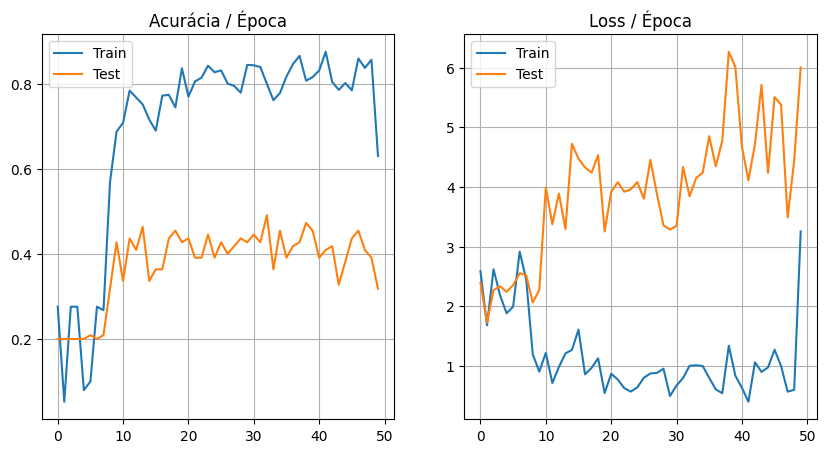

In [7]:
hist = model.history.history

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

ax[0].plot(hist['train_acc'],label='Train')
ax[0].plot(hist['val_acc'],label='Test')
ax[0].grid(True,'both')
ax[0].set_title('Acurácia / Época')
ax[0].legend()

ax[1].plot(hist['train_loss'],label='Train')
ax[1].plot(hist['val_loss'],label='Test')
ax[1].grid(True,'both')
ax[1].set_title('Loss / Época')
ax[1].legend()

plt.show()